In [1]:
import matplotlib.pyplot as plt
import planetmapper
from io_funcs import DefinitelyRealIo
from plotting import get_arcsec_extents
import ehtplot
import scienceplots

# plt.style.use(['science', 'bright', 'no-latex'])
plt.rcParams['font.size'] = 15

**WARNING**: LOCAL JWST PRD VERSION PRDOPSSOC-063 DOESN'T MATCH THE CURRENT ONLINE VERSION PRDOPSSOC-065
Please consider updating pysiaf, e.g. pip install --upgrade pysiaf or conda update pysiaf


dLux: Jax is running in 32-bit, to enable 64-bit visit: https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision


In [2]:
import jax.numpy as np
img = np.load("distribution_prior.npy")

In [3]:
from volcanoes import volcanoes

def io_on_that_day(
        n_volc = 0,
        body='io',
        date='2022-08-01T16:52:00.000',
        observer='jwst',
        **kwargs
        ):
    
    """
    Use this with body.plot_wireframe_angular to plot the body on a map.
    """
    body = planetmapper.Body(body, date, observer=observer, **kwargs)

    if n_volc == 'all':
        n_volc = len(volcanoes)
    body.coordinates_of_interest_lonlat = volcanoes[:n_volc]

    return body

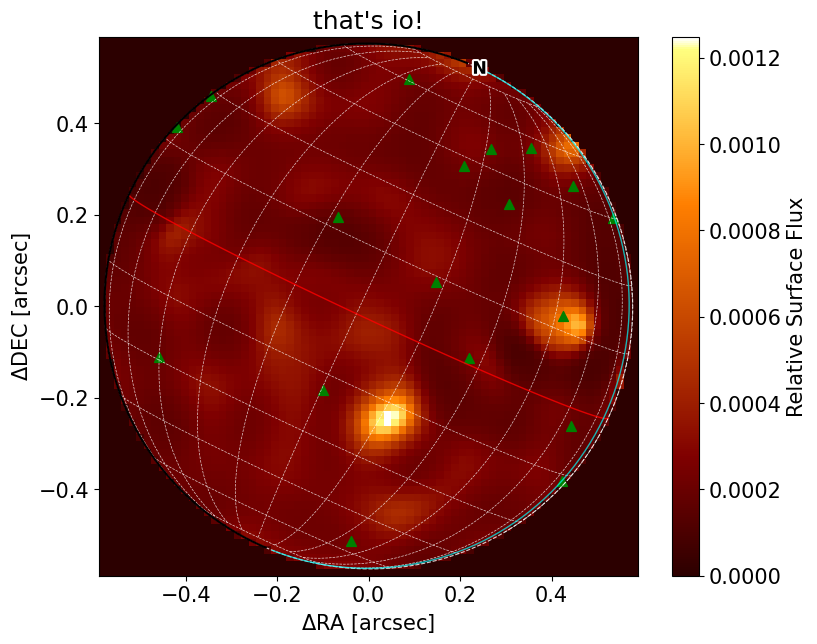

In [4]:
sim_io = DefinitelyRealIo(night_day_ratio=1, volc_frac=0.2, seed=2, n_volcanoes=3)
body = io_on_that_day(n_volc='all')

fig, ax = plt.subplots(figsize=(8.7, 7))

body.plot_wireframe_angular(
    ax,
    add_title=False,
    label_poles=True,
    indicate_equator=True,
    indicate_prime_meridian=True,
    grid_interval=15,
    grid_lat_limit=75,
    formatting={
        'limb': {'linestyle': '--', 'linewidth': 0.8, 'alpha': 0.8, 'color': 'white'},
        'grid': {'linestyle': '--', 'linewidth': 0.5, 'alpha': 0.8, 'color': 'white'},
        'equator': {'linewidth': 1, 'color': 'r', 'label': 'equator'},
        'terminator': {'linewidth': 1, 'linestyle': '-', 'color': 'aqua', 'alpha': 0.7, 'label': 'terminator'},
        'coordinate_of_interest_lonlat': {'color': 'g', 'marker': '^', 's': 50, 'label': 'volcano'},
        # 'limb_illuminated': {'color': 'b'},
    },
    )


ax.axis('equal')
ax.set(
    title='that\'s io!',
    xlabel=r'$\Delta$RA [arcsec]',
    ylabel=r'$\Delta$DEC [arcsec]',
    # xlim=[-1, 1],
    # ylim=[-1, 1],
)

im = ax.imshow(
    img,
    alpha=1, 
    extent=get_arcsec_extents(sim_io.pixel_scale / sim_io.oversample, sim_io.distribution.shape),
    cmap="afmhot_10u",
    )
fig.colorbar(im, label="Relative Surface Flux")
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(
#     by_label.values(),
#     by_label.keys(),
#     loc='upper left',
#     )
plt.show()

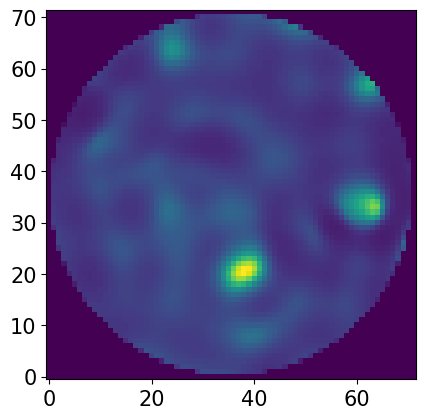

In [5]:
plt.imshow(img)

In [6]:
from matplotlib import pyplot as plt, colormaps
from matplotlib.transforms import Affine2D
from matplotlib.colors import PowerNorm
from plotting import plot_diffraction_limit
def plot_io(
    ax,
    array,
    roll_angle_degrees: float = 0.0,
    pixel_scale: float = 0.0656 / 4,
    model=None,
    show_diff_lim: bool = True,
    cmap: str = "afmhot_10u",
    bg_color: str = "k",
    axis_labels: dict = {
        "xlabel": r"$\Delta$RA [arcsec]",
        "ylabel": r"$\Delta$DEC [arcsec]",
    },
    vmin: float = 0.0,
    vmax: float = None,
    power=0.5,
):
    rotation_transform = Affine2D().rotate_deg(
        roll_angle_degrees
    )  # Create a rotation transformation

    ax.set_facecolor(bg_color)  # Set the background colour to black
    ax.set(**axis_labels)  # Set the axis labels
    if model is not None:
        pixel_scale = model.psf_pixel_scale / model.optics.oversample
        if show_diff_lim:
            ax = plot_diffraction_limit(model, ax, OOP=True)
    im = ax.imshow(
        array,
        cmap=cmap,
        extent=get_arcsec_extents(pixel_scale, array.shape),
        norm=PowerNorm(power, vmin=vmin, vmax=vmax),
    )

    trans_data = rotation_transform + ax.transData  # creating transformation
    im.set_transform(trans_data)  # applying transformation to image

    return im

NameError: name 'plot_io_with_ephemeris' is not defined

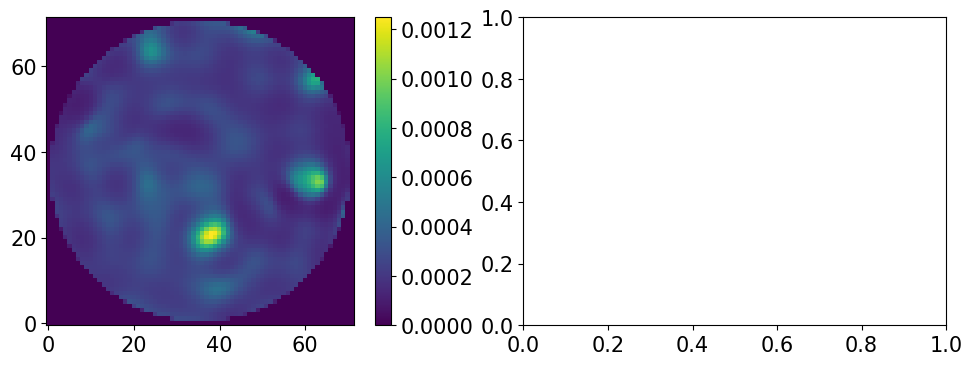

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
c0 = ax[0].imshow(img)
fig.colorbar(c0)

plot_io_with_ephemeris(ax[1], img)

# ax.axis('equal')
ax[1].set(
    title='that\'s io!',
    xlabel=r'$\Delta$RA [arcsec]',
    ylabel=r'$\Delta$DEC [arcsec]',
    # xlim=[-1, 1],
    # ylim=[-1, 1],
)

# plt.tight_layout()
plt.show()